In [1]:
# # finds the similar terms in city column which could be caused by variations of names or misspeling
# from difflib import SequenceMatcher # check similarity of text
# def getSimilarity(a, b):
#     return SequenceMatcher(None, a, b).ratio()

# cities = sorted(list(df["city"].unique()))

# for i in range(0, len(cities)):
#     for j in range(i+1, len(cities)):
#         similarity = getSimilarity(cities[i], cities[j])
#         if similarity > 0.95:
#             print(f"{cities[i]} & {cities[j]} | similarity: {round(similarity,2)} | (index: {i}, {j})  ")




import pandas as pd

# visuals
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px


/Users/rezanaghshineh/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# import data
df = pd.read_csv("UkTiersponsors_All.csv")

# rename cols
df.columns = ["company", "city", "industry", "main_tier", "sub_tier", "date"]

# datetime
df["date"] = pd.to_datetime(df["date"])
# df['date'] = df['date'].dt.strftime('%d/%m/%Y') # date format
df["year"] = df["date"].apply(lambda x: x.year) # year

# lowercased city
df["city"] = df["city"].apply(str.lower)
df.head()

# drop rows of 20123
# indx_2013 = df[df["year"]==2013].index
# df.drop(indx_2013, axis=0, inplace=True)


df_year = df.groupby("year").count()

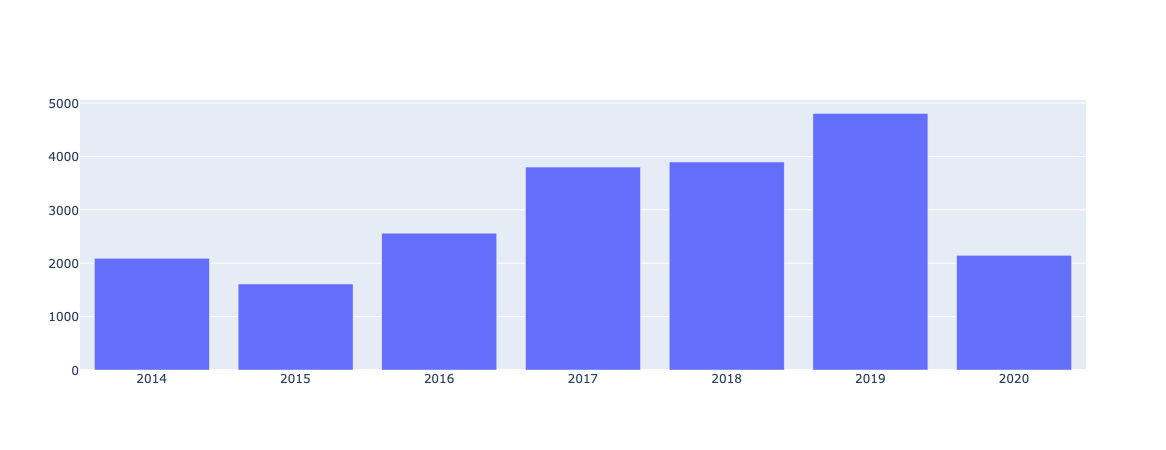

In [13]:
# total number of registers per year
# Create traces
f_years = df_year[df_year.index>2013] # filter unwanted years

fig = go.Figure()
fig.add_trace(go.Bar(x=f_years.index, y=f_years["company"]))
fig.show()

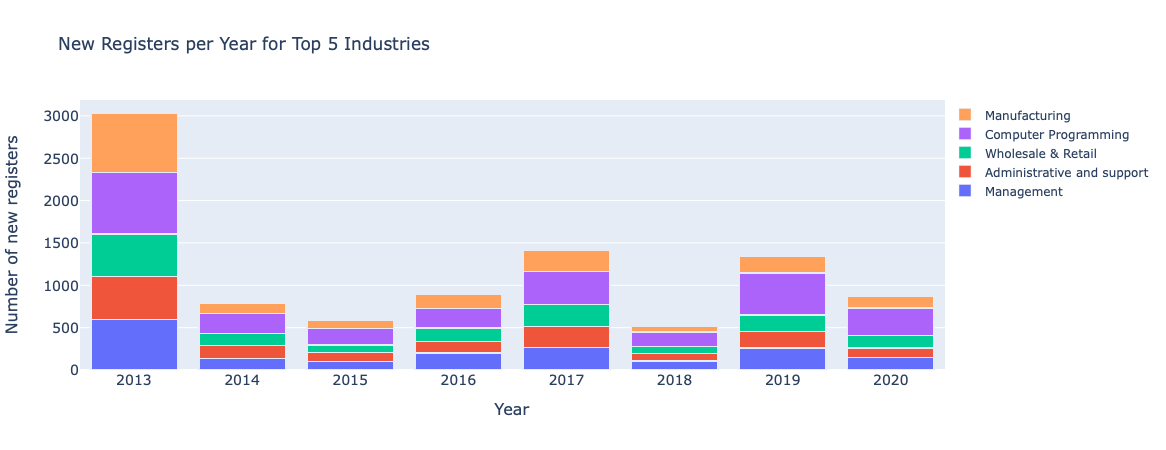

In [14]:
# dataframe of only top10 industries
N = 5
top_indus = list(df["industry"].value_counts().keys()[1:N+1]) # top n
df_top_indus = df[df["industry"].isin(top_indus)] # if inndustry * is in * top


# group data by year and by industry
g_year_comp = df_top_indus.groupby(["year", "industry"]) # group
years  = list(set([year_indus_tuple[0] for year_indus_tuple in list(g_year_comp.groups.keys())])) # extraxt years
industries  = list(set([year_indus_tuple[1] for year_indus_tuple in list(g_year_comp.groups.keys())])) # extraxt industries

# a dict to store the count of each industry for each year. e.g: {"Others":[10, 20, 30]}, the value referes to first, second and third year's counts.
indus_yearCount = {i:[] for i in industries}

for indus in industries:
    for year in years:
        try:
            count = g_year_comp.get_group((year, indus)).count()["company"] # count of the companies per year per industry

            indus_yearCount[indus].append(count)
        except Exception as e:
            indus_yearCount[indus].append(0)



# plot
fig = go.Figure()
for indux, countList in indus_yearCount.items():
    fig.add_trace(go.Bar(name=indux, x=years, y=countList)) # add trace of each group


# Change the bar mode
fig.update_layout(
    title=f'New Registers per Year for Top {N} Industries',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of new registers',
        titlefont_size=16,
        tickfont_size=14,
    ),
    xaxis=dict(
        title='Year',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=1,
        y=1,
#         bgcolor='rgba(255, 255, 255, 0)',
#         bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode="stack"
)
fig.show()

In [ ]:
def find_company(term, df=df):
    def lookFor(row, term):
        if term.lower() in row["company"].lower():
            return row.name
    results = df.apply(lookFor, axis=1, args=(term,))
    return df.loc[results.dropna().index]

    
find_company("limited")